<a href="https://colab.research.google.com/github/erazocar/regressions_ml_hw4/blob/main/Ridge_Lasso_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lasso and Ridge Regression Analysis**
# **Required Libraries**

In [1]:
#importing required libraries
import numpy as np
import os
import pandas as pd
import scipy as sp

#Gensim library for document selection and LSI
import sklearn as sk
from sklearn import datasets
from sklearn import linear_model as lm

#Visualization libraries
import matplotlib.pyplot as plt

## **Function Definition**

In [2]:
#Reader for each file, appended to a list.
def reader(path):
  data = pd.read_csv(path, delim_whitespace=True, header = None)
  for i,j in enumerate(data.values):
    for k in range(len(j)):
      if (isinstance(j[k], str)):
        data.loc[i,k] = float(j[k].split(':')[1])
  return data

In [3]:
#Creating dataset and labels for the Boston housing data
def boston_split(sets, testing_size):
  var = []
  #Separating data into dataset and labels
  variables = sets.drop(0, axis=1)
  labels = sets[0]

  #Splitting the data into training and testing datasets, depending on the
  #size of the test
  splitter = sk.model_selection.train_test_split
  X_train, X_test, y_train, y_test = splitter(variables, labels, test_size = testing_size)
  var.append(X_train)
  var.append(y_train)
  var.append(X_test)
  var.append(y_test)
  return var

In [4]:
#Optimal solution function Ridge for BS data
def optim_ridge(data):
  ridgereg = lm.Ridge(alpha = 1 * (2*data[0].count()))
  ridgereg.fit(data.drop(0, axis=1),data[0])
  return ridgereg.coef_, ridgereg.intercept_

In [5]:
#Optimal solution function Lasso for BS data
def optim_lasso(data):
  lassoreg = lm.Lasso(alpha = 1)
  lassoreg.fit(data.drop(0, axis=1),data[0])
  return lassoreg.coef_, lassoreg.intercept_

In [6]:
#Optimal solution function Ridge for E2006 data
def optim_ridge_e20(data):
  ridgereg = lm.Ridge(alpha = 1 * (2*len(data[1])))
  ridgereg.fit(data[0],data[1])
  return ridgereg.coef_, ridgereg.intercept_

In [7]:
#Optimal solution function Lasso for E2006 data
def optim_lasso_e20(data):
  lassoreg = lm.Lasso(alpha = 1)
  lassoreg.fit(data[0],data[1])
  return lassoreg.coef_, lassoreg.intercept_

In [8]:
#Ridge model generator (also plotter)
def ridge_model(X_train, y_train, X_test, y_test, alpha):
  #Fitting the model
  ridgereg = lm.Ridge(alpha=alpha*(2*len(y_train)))
  ridgereg.fit(X_train, y_train)
  y_pred_train = ridgereg.predict(X_train)
  y_pred = ridgereg.predict(X_test)

  plt.scatter(y_test, y_pred)
  plt.tight_layout()
  plt.title('Plot for alpha: %.3g'%alpha)
  plt.show()

  rss = sum ((y_pred-y_test)**2)
  ret = [rss]
  ret.extend([ridgereg.intercept_])
  ret.extend(ridgereg.coef_)
  return ret

In [9]:
#Lasso model generator (also plotter)
def lasso_model(X_train, y_train, X_test, y_test, alpha):
  #Fitting the model
  lassoreg = lm.Lasso(alpha=alpha)
  lassoreg.fit(X_train, y_train)
  y_pred_train = lassoreg.predict(X_train)
  y_pred = lassoreg.predict(X_test)

  plt.scatter(y_test, y_pred)
  plt.tight_layout()
  plt.title('Plot for alpha: %.3g'%alpha)
  plt.show()

  rss = sum ((y_pred-y_test)**2)
  ret = [rss]
  ret.extend([lassoreg.intercept_])
  ret.extend(lassoreg.coef_)
  return ret

In [10]:
#Creating dataset and labels for the E2006 dataset
def e2006_split(training_set, testing_set):
  var  = []
  var.append(training_set[0])
  var.append(training_set[1])
  var.append(testing_set[0])
  var.append(testing_set[1])

  return var

In [11]:
#Coefficient matrix generator
def coeff_matrices(alphas,model, X_train, y_train, X_test, y_test):
  var = []
  ind = ['alpha_%.2g'%alphas[i] for i in range(len(alphas))]
  for i in range(len(alphas)):
    var.append(model(X_train, y_train, X_test, y_test, alphas[i]))
  
  matrix = pd.DataFrame(var, index=ind)
  return matrix

In [12]:
#Plot RMSE for the datasets
def plot_rmse(alphas, matrix, name):
  plt.plot(alphas, matrix[0])
  plt.tight_layout()
  plt.title('Alpha vs RMSE for ' + name)
  plt.show()

In [13]:
#Function calculation Kfold CV for ridge regression
def ridge_kfold(alphas,X_train, y_train):
  regressor = lm.RidgeCV(alphas = alphas)
  regressor.fit(X_train, y_train)
  return regressor.alpha_

In [14]:
#Function calculation Kfold CV for lasso regression
def lasso_kfold(alphas, X_train, y_train):
  regressor = lm.LassoCV(alphas=alphas)
  regressor.fit(X_train, y_train)
  return regressor.alpha_

## **Preprocessing**

In [15]:
#Read paths and create contents for the documents.
#Please put the local paths were the queries and docs are located when running.
#Data for problem 1
path1 = '/content/drive/MyDrive/MachineLearning/homework-4/house.txt'
path2 = '/content/drive/MyDrive/MachineLearning/homework-4/house_scale.txt'

BostonHouse = reader(path1)
BostonHouse_scaled = reader(path2)

In [16]:
#Data for problem 2
path3 = '/content/drive/MyDrive/MachineLearning/homework-4/E2006test.txt'
path4 = '/content/drive/MyDrive/MachineLearning/homework-4/E2006train.txt'

#Reading the data from E2006 files using sklearn tools
E2006_test = datasets.load_svmlight_file(path3)
E2006_train = datasets.load_svmlight_file(path4)

## **Problem 1**

###**Question 1**


In [17]:
#Optimal Solutions
BHS_ridge_opt_coef, BHS_ridge_opt_int = optim_ridge(BostonHouse_scaled)
BHS_lasso_opt_coef, BHS_lasso_opt_int = optim_lasso(BostonHouse_scaled)

In [18]:
#Visualize the optimum w vector and score for btoh lasso and ridge with alpha = 1
print('ridge cost vector w: '+ str(BHS_ridge_opt_coef), 'ridge best intercept:' +str(BHS_ridge_opt_int))
print()
print('lasso cost vector w: '+str(BHS_lasso_opt_coef), 'lasso best intercept:'+str(BHS_lasso_opt_int))

ridge cost vector w: [-0.21037524  0.45090389 -0.62643104  0.35495024 -0.49434926  0.7018458
 -0.51369302  0.12345353 -0.59464792 -0.72642006 -0.75432354  0.43114583
 -0.97534982] ridge best intercept:22.111442512621373

lasso cost vector w: [-0.          0.         -0.          0.         -0.          0.
 -0.          0.         -0.         -0.42655753 -2.11418534  0.
 -9.46050116] lasso best intercept:19.22869043481334


###**Question 2**

In [19]:
#Values of alphas used throughout the experiment.
alpha_use = [0, 0.001, 0.01, 0.1, 1, 10, 100]

#Splitted 400 examples as training and 106 examples as testing (21%)
#Used in both ridge and lasso regressions.
BHS_splitted = boston_split(BostonHouse_scaled, 0.21)

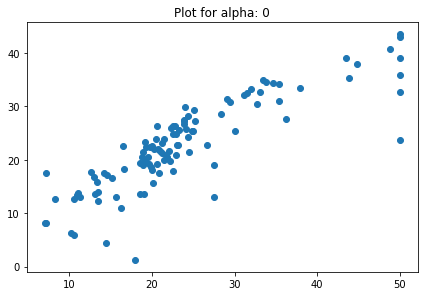

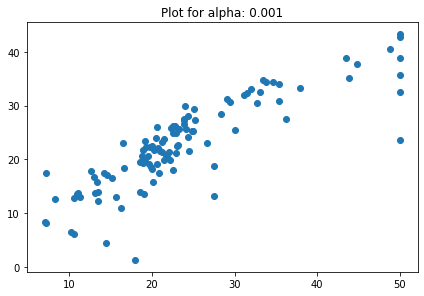

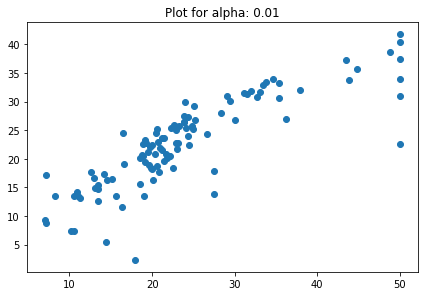

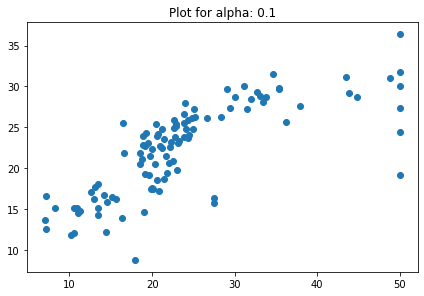

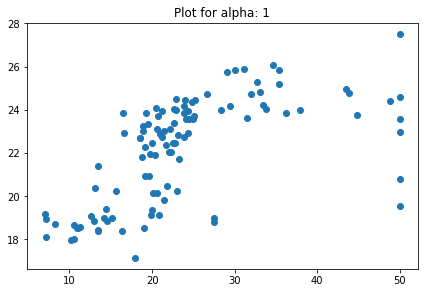

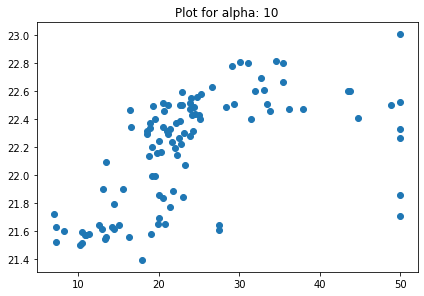

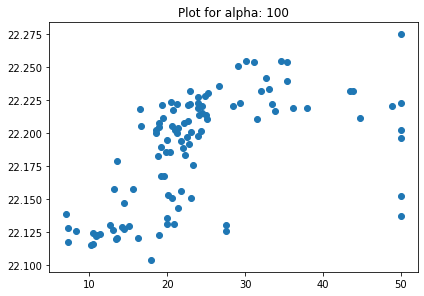

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
alpha_0,3168.989276,11.590168,-4.503689,1.852262,-0.134246,1.062627,-3.548593,10.330970,-0.503773,-7.496091,3.020617,-3.081556,-4.292154,2.042256,-8.653637
alpha_0.001,3200.864480,12.075404,-4.145692,1.744801,-0.237970,1.087285,-3.359129,10.114307,-0.475768,-7.101031,2.837143,-2.914546,-4.272786,2.039692,-8.637592
alpha_0.01,3501.068922,14.712653,-2.531162,1.247874,-0.795850,1.224650,-2.364855,8.552154,-0.398028,-4.900399,1.882378,-2.115495,-4.084264,1.971047,-8.136990
alpha_0.1,5550.544158,19.864281,-0.796166,0.910993,-1.298030,1.177655,-1.096874,3.689558,-0.766159,-1.009735,-0.021137,-1.291466,-2.635084,1.330617,-4.273853
alpha_1,8923.633859,21.721489,-0.219624,0.444730,-0.620570,0.295032,-0.524501,0.651767,-0.560412,0.162696,-0.596495,-0.711789,-0.690098,0.432917,-0.941984
alpha_10,11041.463215,22.114981,-0.033289,0.071787,-0.101948,0.032896,-0.089765,0.076705,-0.098090,0.043013,-0.118883,-0.124022,-0.093671,0.065569,-0.124038
alpha_1e+02,11470.067325,22.180165,-0.003533,0.007663,-0.010912,0.003317,-0.009656,0.007855,-0.010569,0.004791,-0.012978,-0.013366,-0.009787,0.006954,-0.012917


In [20]:
#Creation of coefficient matrix for ridge regression. First and second column represent the RMSE and
#the intercept
BHS_matrix_ridge= coeff_matrices(alpha_use, ridge_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
BHS_matrix_ridge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4013.951564265866, tolerance: 3.125360225563911
  positive)


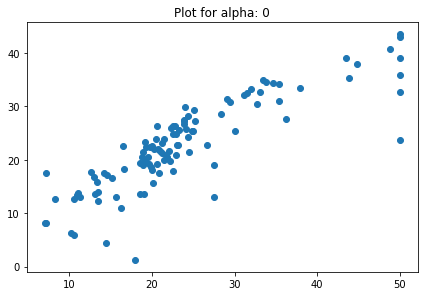

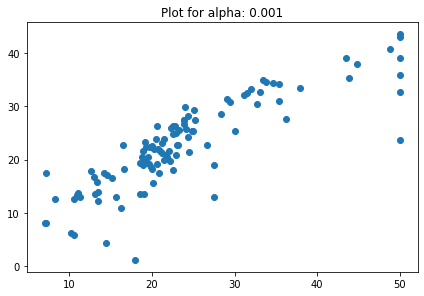

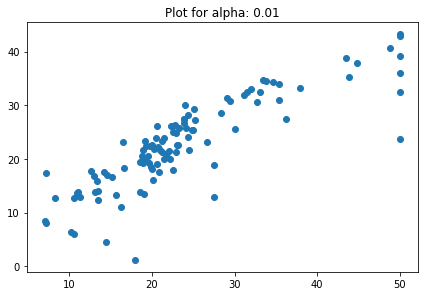

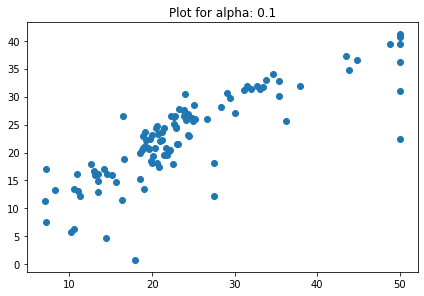

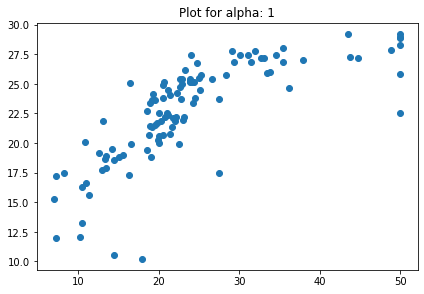

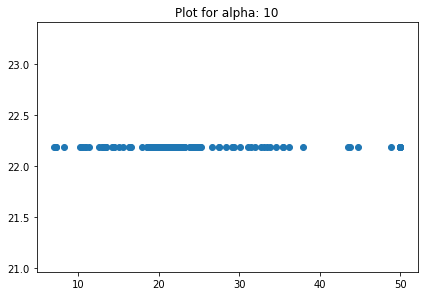

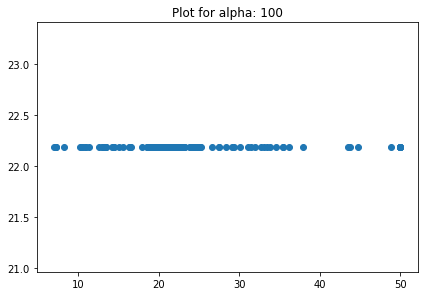

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
alpha_0,3168.989276,11.590168,-4.503689,1.852262,-0.134246,1.062627,-3.548593,10.330970,-0.503773,-7.496091,3.020617,-3.081556,-4.292154,2.042256,-8.653637
alpha_0.001,3171.630031,11.644693,-4.454484,1.836169,-0.135565,1.061764,-3.529756,10.331043,-0.496986,-7.449334,2.987488,-3.053075,-4.287904,2.038632,-8.659800
alpha_0.01,3197.263140,12.134892,-4.012433,1.691800,-0.147003,1.053871,-3.360288,10.330915,-0.435585,-7.028572,2.690856,-2.798404,-4.249763,2.006042,-8.715687
alpha_0.1,3625.007981,16.753299,-0.000000,0.265039,-0.194932,0.961162,-1.645185,10.319695,-0.000000,-2.946207,0.000000,-0.504693,-3.887883,1.687501,-9.168003
alpha_1,6334.668117,19.008645,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.706971,-1.583022,0.000000,-8.982980
alpha_10,11522.862703,22.187970,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000
alpha_1e+02,11522.862703,22.187970,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000


In [21]:
#Creation of coefficient matrix for lasso regression. First and second column represent the RMSE and
#the intercept
BHS_matrix_lasso= coeff_matrices(alpha_use, lasso_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
BHS_matrix_lasso

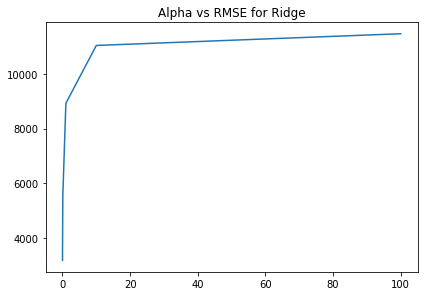

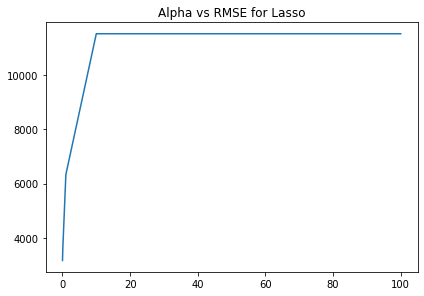

In [22]:
#Plotting the alpha vs RMSE for Ridge and Lasso regressions
plot_rmse(alpha_use, BHS_matrix_ridge, 'Ridge')
plot_rmse(alpha_use, BHS_matrix_lasso, 'Lasso')

### **Question 3**

In [31]:
#From sklearn, return the best alpha and the mean square error
#Using the same alphas as before.
BHS_ridge_alpha = ridge_kfold(alpha_use[1:] * 2*len(BHS_splitted[1]),BHS_splitted[0], BHS_splitted[1])
BHS_lasso_alpha = lasso_kfold(alpha_use[1:], BHS_splitted[0], BHS_splitted[1])

In [32]:
#Reporting the best alphas from the 400 dataset.
print('Ridge best alpha for BH scaled data: '+str(BHS_ridge_alpha))
print('Lasso best alpha for BH scaled data: '+str(BHS_lasso_alpha))

Ridge best alpha for BH scaled data: 1.0
Lasso best alpha for BH scaled data: 0.001


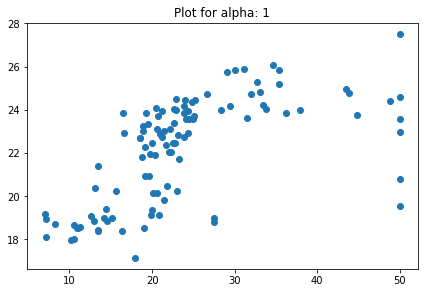

RMSE for best alpha in ridge on BH scaled data: alpha_1    8923.633859
Name: 0, dtype: float64


In [33]:
#Training the data once again using only the best alpha for ridge
BHS_bestalpha_matrix_ridge= coeff_matrices([BHS_ridge_alpha], ridge_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
print('RMSE for best alpha in ridge on BH scaled data: '+str(BHS_bestalpha_matrix_ridge[0]))

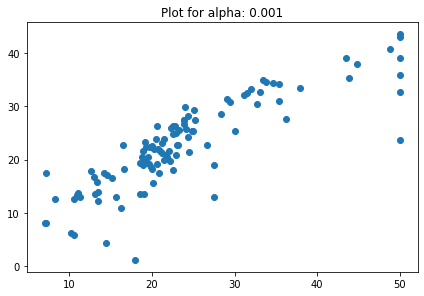

RMSE for best alpha in lasso on BH scaled data: alpha_0.001    3171.630031
Name: 0, dtype: float64


In [34]:
#Training the data once again using only the best alpha for lasso
BHS_bestalpha_matrix_lasso= coeff_matrices([BHS_lasso_alpha], lasso_model, BHS_splitted[0], BHS_splitted[1], BHS_splitted[2], BHS_splitted[3])
print('RMSE for best alpha in lasso on BH scaled data: '+str(BHS_bestalpha_matrix_lasso[0]))

### **Question 4**

In [35]:
#Splitted 400 examples as training and 106 examples as testing (21%)
#Used in both ridge and lasso regressions.
BH_splitted = boston_split(BostonHouse, 0.21)

In [36]:
#Using the same alphas as before.
BH_ridge_alpha = ridge_kfold(alpha_use[1:]*2*len(BH_splitted[1]),BH_splitted[0], BH_splitted[1])
BH_lasso_alpha = lasso_kfold(alpha_use[1:], BH_splitted[0], BH_splitted[1])

In [37]:
#Reporting the best alphas from the 400 dataset on original BH data.
print('Ridge best alpha for BH original data: '+str(BH_ridge_alpha))
print('Lasso best alpha for BH original data: '+str(BH_lasso_alpha))

Ridge best alpha for BH original data: 0.01
Lasso best alpha for BH original data: 0.001


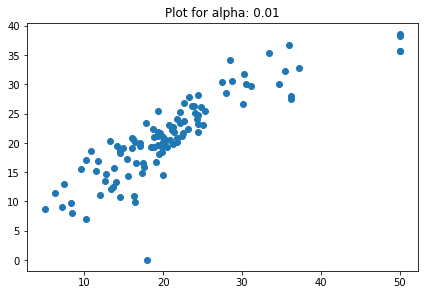

RMSE for best alpha in ridge on BH original data: alpha_0.01    2100.050906
Name: 0, dtype: float64


In [38]:
#Training the data only the best alpha for ridge on BH original data
BH_bestalpha_matrix_ridge= coeff_matrices([BH_ridge_alpha], ridge_model, BH_splitted[0], BH_splitted[1], BH_splitted[2], BH_splitted[3])
print('RMSE for best alpha in ridge on BH original data: '+str(BH_bestalpha_matrix_ridge[0]))

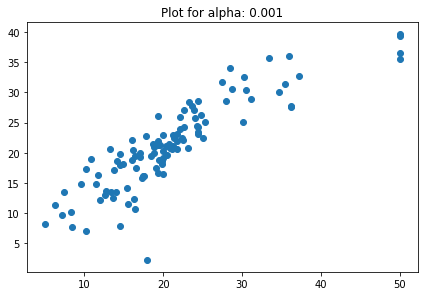

RMSE for best alpha in lasso on BH original data: alpha_0.001    2029.058137
Name: 0, dtype: float64


In [39]:
#Training the data once again using only the best alpha for lasso on BH original data
BH_bestalpha_matrix_lasso= coeff_matrices([BH_lasso_alpha], lasso_model, BH_splitted[0], BH_splitted[1], BH_splitted[2], BH_splitted[3])
print('RMSE for best alpha in lasso on BH original data: '+str(BH_bestalpha_matrix_lasso[0]))

## **Problem 2**

### **Question 1**

In [40]:
#Data split into traiing and testing sets
e2006_data = e2006_split(E2006_train, E2006_test)

In [41]:
print(e2006_data[0].shape,len(e2006_data[1]),e2006_data[2].shape,len(e2006_data[3]))

(3308, 150358) 3308 (16087, 150360) 16087


In [42]:
e2006_data[0] = sp.sparse.hstack([e2006_data[0], sp.sparse.csr_matrix((3308,2))])

In [43]:
print(e2006_data[0].shape,len(e2006_data[1]),e2006_data[2].shape,len(e2006_data[3]))

(3308, 150360) 3308 (16087, 150360) 16087


In [44]:
#Optimal Solutions
e2006_ridge_opt_coef, e2006_ridge_opt_int = optim_ridge_e20(e2006_data)
e2006_lasso_opt_coef, e2006_lasso_opt_int = optim_lasso_e20(e2006_data)

In [45]:
#Visualize the optimum w vector and score for btoh lasso and ridge with alpha = 1
print('ridge cost vector w:'+ str(e2006_ridge_opt_coef), 'ridge best intercept:' +str(e2006_ridge_opt_int))
print()
print('lasso cost vector w:'+str(e2006_lasso_opt_coef), 'lasso best intercept:'+str(e2006_lasso_opt_int))

ridge cost vector w:[ 7.99130684e-02  0.00000000e+00  0.00000000e+00 ... -6.97128470e-08
  0.00000000e+00  0.00000000e+00] ridge best intercept:-3.5182555830852835

lasso cost vector w:[ 0.  0.  0. ... -0.  0.  0.] lasso best intercept:-3.8200363770516166


### **Question 2**

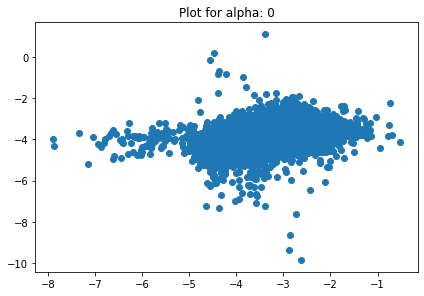

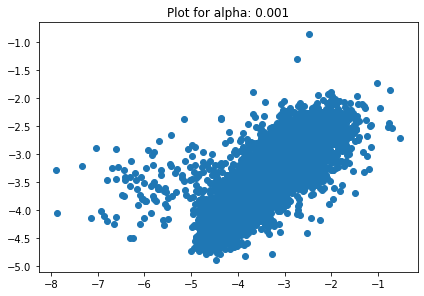

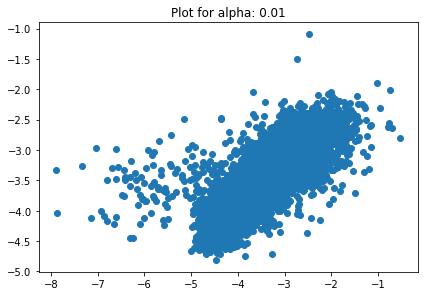

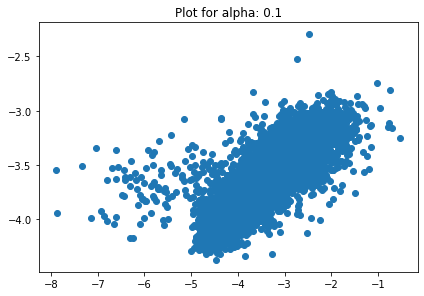

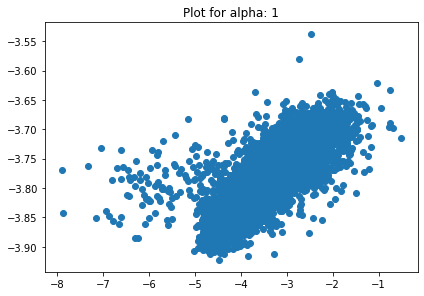

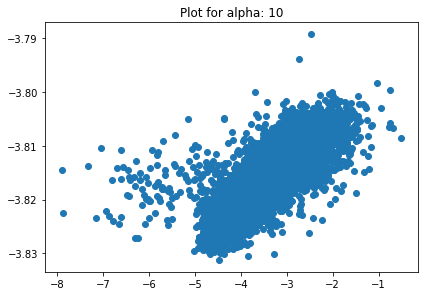

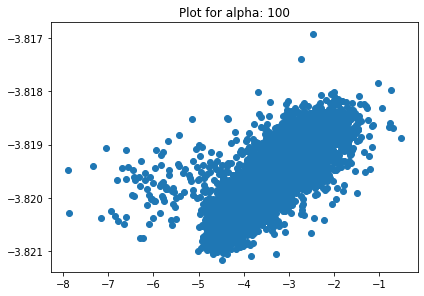

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150322,150323,150324,150325,150326,150327,150328,150329,150330,150331,150332,150333,150334,150335,150336,150337,150338,150339,150340,150341,150342,150343,150344,150345,150346,150347,150348,150349,150350,150351,150352,150353,150354,150355,150356,150357,150358,150359,150360,150361
alpha_0,7104.557879,-4.182466,-0.114345,0.0,0.0,2.215725e+00,-1.570847e-03,0.0,0.0,0.0,0.0,-1.285472e-02,0.0,2.183447e-02,1.293618e+00,5.532934e+00,-3.931102e+00,5.327339e-02,-3.547725e+00,4.582860e+00,-1.794054e+00,-2.479642e-02,-2.183507e+00,0.0,0.0,8.714717e+00,0.0,7.784917e-01,4.133653e+00,-4.901342e-01,0.0,-7.489583e+00,-1.242793e-01,7.595787e+00,8.889930e-01,2.373761e+00,1.203992e+01,1.607008e+01,1.018702e+01,1.890297e+00,...,0.0,0.0,0.0,0.0,0.0,-4.855714e-02,0.0,0.0,0.0,-5.229991e-02,-5.229991e-02,0.0,0.0,-5.229991e-02,-1.045998e-01,-5.229991e-02,0.0,0.0,0.0,0.0,0.0,-9.711429e-02,0.0,0.0,0.0,-4.855714e-02,0.0,0.0,0.0,0.0,0.0,0.0,-1.568997e-01,0.0,0.0,0.0,-5.229991e-02,-1.568997e-01,0.0,0.0
alpha_0.001,2233.659620,-0.651775,0.838980,0.0,0.0,-3.201070e-04,2.620133e-09,0.0,0.0,0.0,0.0,-9.541358e-07,0.0,7.651682e-07,-4.517334e-04,-3.745310e-04,-2.904389e-04,-8.105625e-07,-8.225293e-05,6.084757e-04,-4.714523e-04,1.038883e-06,-2.431410e-04,0.0,0.0,1.139777e-04,0.0,5.931035e-05,3.969280e-04,2.746295e-05,0.0,3.972720e-05,4.811388e-05,9.675213e-04,5.567050e-05,2.668670e-04,2.027769e-03,1.819276e-03,2.337070e-03,1.426669e-04,...,0.0,0.0,0.0,0.0,0.0,-1.319364e-05,0.0,0.0,0.0,-1.421060e-05,-1.421060e-05,0.0,0.0,-1.421060e-05,-2.842120e-05,-1.421060e-05,0.0,0.0,0.0,0.0,0.0,-2.638728e-05,0.0,0.0,0.0,-1.319364e-05,0.0,0.0,0.0,0.0,0.0,0.0,-4.263180e-05,0.0,0.0,0.0,-1.421060e-05,-4.263180e-05,0.0,0.0
alpha_0.01,2273.105903,-0.900532,0.773101,0.0,0.0,-4.035725e-05,-2.717889e-09,0.0,0.0,0.0,0.0,-1.356277e-07,0.0,9.191776e-08,-4.850544e-05,-3.949350e-05,-4.073424e-05,-6.706082e-08,-1.684886e-05,8.060999e-05,-6.133762e-05,1.707063e-07,-3.090919e-05,0.0,0.0,-9.322940e-06,0.0,6.086999e-06,7.206969e-05,3.086060e-06,0.0,-2.908214e-05,3.254691e-06,1.333198e-04,7.767522e-06,3.333736e-05,2.703166e-04,2.444547e-04,2.921723e-04,1.883362e-05,...,0.0,0.0,0.0,0.0,0.0,-1.396140e-06,0.0,0.0,0.0,-1.503753e-06,-1.503753e-06,0.0,0.0,-1.503753e-06,-3.007507e-06,-1.503753e-06,0.0,0.0,0.0,0.0,0.0,-2.792279e-06,0.0,0.0,0.0,-1.396140e-06,0.0,0.0,0.0,0.0,0.0,0.0,-4.511260e-06,0.0,0.0,0.0,-1.503753e-06,-4.511260e-06,0.0,0.0
alpha_0.1,3588.038390,-2.187696,0.432252,0.0,0.0,-8.208580e-06,-1.774236e-09,0.0,0.0,0.0,0.0,-3.367457e-08,0.0,1.755299e-08,-6.548718e-06,-4.959394e-06,-9.970320e-06,1.856027e-09,-6.081926e-06,1.825498e-05,-1.335308e-05,5.116144e-08,-6.524721e-06,0.0,0.0,-1.134300e-05,0.0,6.947259e-07,2.377817e-05,5.792286e-07,0.0,-1.965577e-05,-4.692944e-07,3.209713e-05,1.932378e-06,6.786727e-06,6.178895e-05,5.615811e-05,5.899392e-05,4.233189e-06,...,0.0,0.0,0.0,0.0,0.0,-1.770536e-07,0.0,0.0,0.0,-1.907008e-07,-1.907008e-07,0.0,0.0,-1.907008e-07,-3.814016e-07,-1.907008e-07,0.0,0.0,0.0,0.0,0.0,-3.541072e-07,0.0,0.0,0.0,-1.770536e-07,0.0,0.0,0.0,0.0,0.0,0.0,-5.721024e-07,0.0,0.0,0.0,-1.907008e-07,-5.721024e-07,0.0,0.0
alpha_1,6907.307776,-3.518256,0.079913,0.0,0.0,-1.252163e-06,-3.327214e-10,0.0,0.0,0.0,0.0,-5.446232e-09,0.0,2.619506e-09,-8.303804e-07,-6.003241e-07,-1.606541e-06,1.070647e-09,-1.062681e-06,2.879153e-06,-2.081498e-06,8.639833e-09,-1.007390e-06,0.0,0.0,-2.210388e-06,0.0,7.836188e-08,4.090651e-06,8.589414e-08,0.0,-3.696658e-06,-1.290808e-07,5.149294e-06,3.126845e-07,1.035573e-06,9.771429e-06,8.893648e-06,8.977101e-06,6.661981e-07,...,0.0,0.0,0.0,0.0,0.0,-2.157465e-08,0.0,0.0,0.0,-2.323762e-08,-2.323762e-08,0.0,0.0,-2.323762e-08,-4.647523e-08,-2.323762e-08,0.0,0.0,0.0,0.0,0.0,-4.314930e-08,0.0,0.0,0.0,-2.157465e-08,0.0,0.0,0.0,0.0,0.0,0.0,-6.971285e-08,0.0,0.0,0.0,-2.323762e-08,-6.971285e-08,0.0,0.0
alpha_10,7819.806278,-3.787059,0.008732,0.0,0.0,-1.339296e-07,-3.

In [46]:
#Creation of coefficient matrix for ridge regression for the E2006data
e2006_matrix_ridge= coeff_matrices(alpha_use, ridge_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
e2006_matrix_ridge

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """


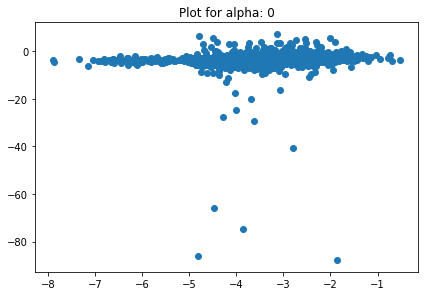

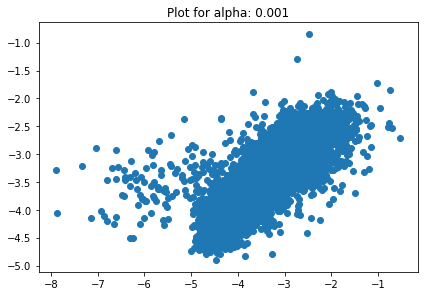

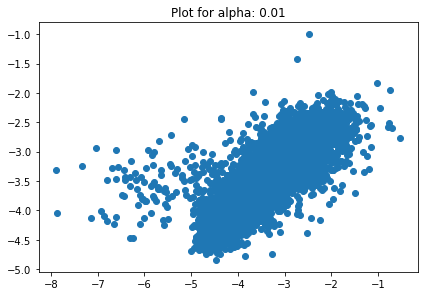

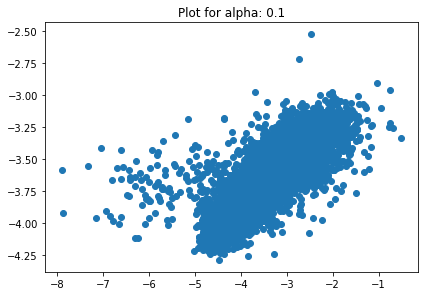

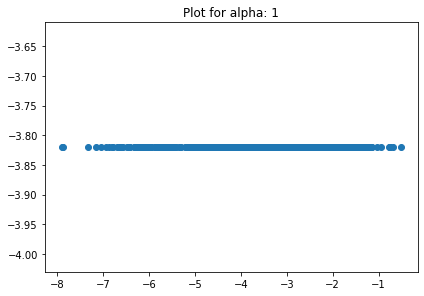

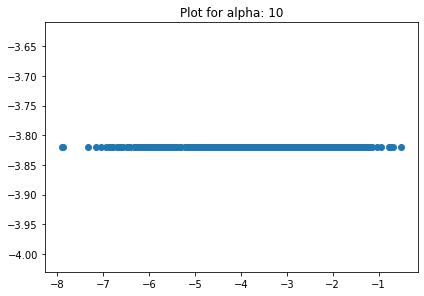

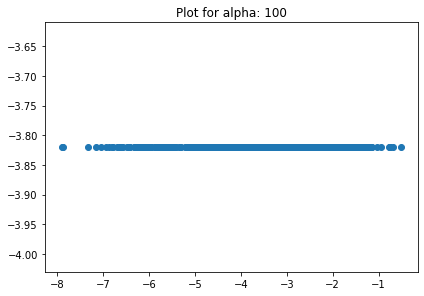

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,150322,150323,150324,150325,150326,150327,150328,150329,150330,150331,150332,150333,150334,150335,150336,150337,150338,150339,150340,150341,150342,150343,150344,150345,150346,150347,150348,150349,150350,150351,150352,150353,150354,150355,150356,150357,150358,150359,150360,150361
alpha_0,35644.433193,-0.555578,0.847368,0.0,0.0,-28.567787,48712.534736,0.0,0.0,0.0,0.0,-6037.956094,0.0,18779.624191,-76.123299,-31.45981,-110.166004,-2944.78173,-223.212381,213.912913,-205.421989,12232.332251,-28.026964,0.0,0.0,5.133832,0.0,599.746303,9.700268,-8.936238,0.0,14.063483,327.596571,31.784469,-140.471462,461.540348,14.867905,-2.87732,32.86668,362.549593,...,0.0,0.0,0.0,0.0,0.0,1.342432e-16,0.0,0.0,0.0,9.940271e-20,8.410705e-23,0.0,0.0,5.357868e-26,6.378415e-28,0.0,0.0,0.0,0.0,0.0,0.0,-1.479920e-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.417425e-27,0.0,0.0,0.0,-5.102732e-27,1.984396e-27,0.0,0.0
alpha_0.001,2233.941557,-0.638057,0.842605,0.0,0.0,-0.000000,0.000000,0.0,0.0,0.0,0.0,-0.000000,0.0,0.000000,-0.000000,-0.00000,-0.000000,-0.00000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0
alpha_0.01,2249.231231,-0.801265,0.799386,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,0.0,0.000000,-0.000000,-0.00000,-0.000000,-0.00000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0
alpha_0.1,4050.931660,-2.433345,0.367203,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,0.0,0.000000,-0.000000,-0.00000,-0.000000,0.00000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0
alpha_1,7937.352508,-3.820036,0.000000,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,0.0,0.000000,-0.000000,-0.00000,-0.000000,0.00000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0
alpha_10,7937.352508,-3.820036,0.000000,0.0,0.0,-0.000000,-0.000000,0.0,0.0,0.0,0.0,-0.000000,0.0,0.000000,-0.000000,-0.00000,-0.000000,0.00000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.000000,0.000000,0.0,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0,-0.000000e+00,-0.000000e+00,-0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.000000e+00,0.0,0.0,0.0,-0.000000e+00,-0.000000e+00,0.0,0.0
alpha_1e+02,7937.352508,-3.820036,0.000000,0.0,0.0,-0.000000,-0.000000,0.0,0

In [47]:
#Creation of coefficient matrix for lasso regression. First and second column represent the RMSE and
#the intercept
e2006_matrix_lasso= coeff_matrices(alpha_use, lasso_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
e2006_matrix_lasso

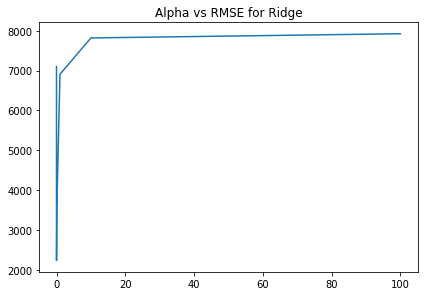

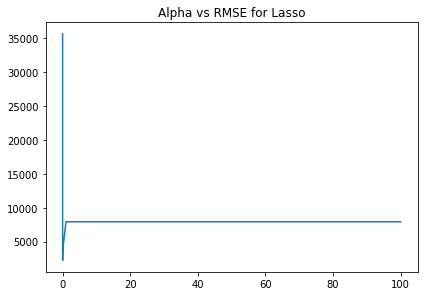

In [48]:
#Plotting the alpha vs RMSE for Ridge and Lasso regressions
plot_rmse(alpha_use, e2006_matrix_ridge, 'Ridge')
plot_rmse(alpha_use, e2006_matrix_lasso, 'Lasso')

### **Question 3**

In [49]:
#From sklearn, return the best alpha and the mean square error
#Using the same alphas as before.
e2006_ridge_alpha = ridge_kfold(alpha_use[1:],e2006_data[0], e2006_data[1])
e2006_lasso_alpha = lasso_kfold(alpha_use[1:], e2006_data[0], e2006_data[1])

In [50]:
#Reporting the best alphas from the training dataset.
print('Ridge best alpha for e2006 data: '+str(e2006_ridge_alpha))
print('Lasso best alpha for e2006 data: '+str(e2006_lasso_alpha))

Ridge best alpha for e2006 data: 0.01
Lasso best alpha for e2006 data: 0.001


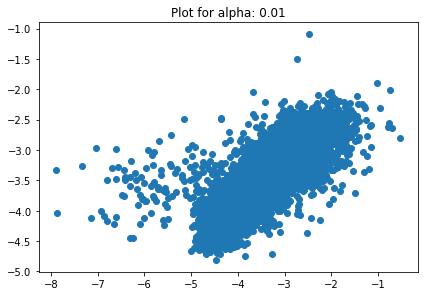

RMSE for best alpha in ridge on e2006 data: alpha_0.01    2273.105903
Name: 0, dtype: float64


In [51]:
#Training the data once again using only the best alpha for ridge
e2006_bestalpha_matrix_ridge= coeff_matrices([e2006_ridge_alpha], ridge_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
print('RMSE for best alpha in ridge on e2006 data: '+str(e2006_bestalpha_matrix_ridge[0]))

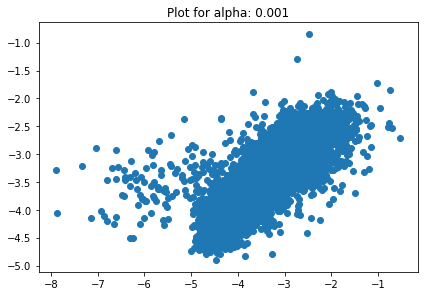

RMSE for best alpha in lasso on e2006 data: alpha_0.001    2233.941557
Name: 0, dtype: float64


In [52]:
#Training the data once again using only the best alpha for lasso
e2006_bestalpha_matrix_lasso= coeff_matrices([e2006_lasso_alpha], lasso_model, e2006_data[0], e2006_data[1], e2006_data[2], e2006_data[3])
print('RMSE for best alpha in lasso on e2006 data: '+str(e2006_bestalpha_matrix_lasso[0]))